In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [43]:
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")
train_df.head()

c:\users\sinhl\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:2902: DtypeWarning: Columns (51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
c:\users\sinhl\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:2902: DtypeWarning: Columns (50) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,label,province,district,age_source1,age_source2,maCv,FIELD_1,FIELD_2,FIELD_3,...,FIELD_48,FIELD_49,FIELD_50,FIELD_51,FIELD_52,FIELD_53,FIELD_54,FIELD_55,FIELD_56,FIELD_57
0,0,0,NaN,NaN,NaN,NaN,NaN,1,1.0,2547.0,...,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0,Tỉnh Đồng Nai,Thành phố Biên Hòa,44.0,44.0,None,1,0.0,-1.0,...,False,True,29.77,17.561,30.955,31.171,0.0,0.04,0.0,0.0
2,2,0,Tỉnh Đồng Nai,Huyện Long Thành,30.0,30.0,Công nhân,0,1.0,3273.0,...,True,True,29.77,56.512,30.955,31.171,0.0,0.16,0.0,0.0
3,3,0,Tỉnh Tuyên Quang,Thành phố Tuyên Quang,43.0,NaN,NaN,0,1.0,3991.0,...,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0,Thành phố Hồ Chí Minh,Quận 1,21.0,21.0,None,0,1.0,1450.0,...,True,True,29.77,13.789,30.955,31.171,0.0,0.03,0.0,0.0


0    29514
1      486
Name: label, dtype: int64
1 label percentage: 1.6199999999999999 %


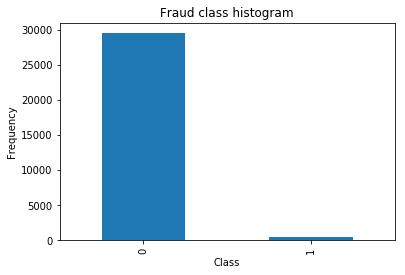

In [12]:
count_classes = pd.value_counts(train_df['label'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")
print(count_classes)
print (f"1 label percentage: {count_classes[1] / train_df.shape[0] * 100} %")

In [13]:
train_df.describe()

,id,label,age_source1,age_source2,FIELD_1,FIELD_2,FIELD_3,FIELD_4,FIELD_5,FIELD_6,...,FIELD_34,FIELD_46,FIELD_50,FIELD_51,FIELD_52,FIELD_53,FIELD_54,FIELD_55,FIELD_56,FIELD_57
count,30000.000000,30000.000000,17189.000000,20322.000000,30000.000000,29537.000000,29537.000000,29537.000000,29537.000000,29537.000000,...,30000.000000,30000.000000,20322.000000,20322.000000,20322.000000,20322.000000,20322.000000,20322.000000,20322.000000,20322.000000
mean,14999.500000,0.016200,33.041015,32.872011,0.775333,0.763145,1731.263466,0.573653,1.781664,0.142262,...,0.455433,0.402733,33.863651,33.747108,33.827021,33.817174,0.037002,0.103469,0.008508,0.008222
std,8660.398374,0.126246,9.187672,9.096176,0.417370,0.425160,1472.537441,0.971284,2.010544,0.448462,...,0.498018,0.490456,11.068959,19.515369,9.442494,9.095917,0.117726,0.086140,0.032152,0.032129
min,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,29.770000,4.413000,30.955000,31.171000,0.000000,0.000000,0.000000,0.000000
25%,7499.750000,0.000000,26.000000,26.000000,1.000000,1.000000,343.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,29.770000,16.799000,30.955000,31.171000,0.000000,0.040000,0.000000,0.000000
50%,14999.500000,0.000000,31.000000,31.000000,1.000000,1.000000,1452.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,29.770000,33.650000,30.955000,31.171000,0.000000,0.110000,0.000000,0.000000
75%,22499.250000,0.000000,39.000000,38.000000,1.000000,1.000000,2913.000000,1.000000,3.000000,0.000000,...,1.000000,1.000000,29.770000,50.853000,30.955000,31.171000,0.000000,0.150000,0.000000,0.000000
max,29999.000000,1.000000,71.000000,89.000000,1.000000,1.000000,8037.000000,12.000000,14.000000,4.000000,...,1.000000,1.000000,67.634000,67.633000,67.634000,67.634000,1.000000,1.000000,0.920000,0.920000


In [14]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [18]:
print(missing_values_table(train_df))
print(missing_values_table(train_df.loc[train_df["label"] == 1, :]))

Your selected dataframe has 64 columns.
There are 51 columns that have missing values.
             Missing Values  % of Total Values
district              12849               42.8
province              12818               42.7
age_source1           12811               42.7
FIELD_13               9700               32.3
maCv                   9679               32.3
FIELD_30               9678               32.3
FIELD_31               9678               32.3
FIELD_35               9678               32.3
FIELD_36               9678               32.3
FIELD_37               9678               32.3
FIELD_38               9678               32.3
FIELD_39               9678               32.3
FIELD_40               9678               32.3
FIELD_41               9678               32.3
FIELD_43               9678               32.3
FIELD_42               9678               32.3
FIELD_28               9678               32.3
FIELD_44               9678               32.3
FIELD_45            

In [16]:
train_df.dtypes.value_counts(0)

object     34
float64    18
int64       9
bool        3
dtype: int64

In [20]:
# Number of unique classes in each object column
print(train_df.select_dtypes('object').apply(pd.Series.nunique, axis = 0))
print(train_df.select_dtypes('float64').apply(pd.Series.nunique, axis = 0))
print(train_df.select_dtypes('int64').apply(pd.Series.nunique, axis = 0))
print(train_df.select_dtypes('bool').apply(pd.Series.nunique, axis = 0))

province      65
district     718
maCv        3066
FIELD_7     7088
FIELD_8        2
FIELD_9       36
FIELD_10       2
FIELD_11      45
FIELD_12       5
FIELD_13     227
FIELD_17       8
FIELD_18       2
FIELD_19       2
FIELD_20       2
FIELD_23       1
FIELD_24       4
FIELD_25       2
FIELD_26       2
FIELD_27       2
FIELD_28       2
FIELD_29       3
FIELD_30       3
FIELD_31       2
FIELD_35       5
FIELD_36       3
FIELD_37       5
FIELD_38       2
FIELD_39      45
FIELD_40       9
FIELD_41       5
FIELD_42       3
FIELD_43       7
FIELD_44       3
FIELD_45       5
dtype: int64
age_source1      64
age_source2      69
FIELD_2           2
FIELD_3         513
FIELD_4          10
FIELD_5          15
FIELD_6           5
FIELD_16          5
FIELD_21          3
FIELD_22        348
FIELD_50          9
FIELD_51       4525
FIELD_52        612
FIELD_53        612
FIELD_54          9
FIELD_55         86
FIELD_56         33
FIELD_57         33
dtype: int64
id          30000
label           2


In [39]:
train_df["FIELD_7"].unique()

array(['[]', "['GD', 'GD', 'TE']", "['DN', 'HN', 'DN']", ...,
       "['BT', 'HS', 'GD', 'GD']",
       "['HT', 'KC', 'TE', 'DN', 'XK', 'HS', 'DN', 'GD']",
       "['HS', 'DN', 'DN', 'GD', 'GD', 'DN', 'DN', 'DN', 'DN']"],
      dtype=object)

In [40]:
train_df["FIELD_47"].unique()

array([ True, False])

In [42]:
train_df.isnull().sum().max()

12849

In [44]:
test_df.isnull().sum().max()

8733